In [12]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz

In [2]:
df = pd.read_csv('D:\Bruno\Datasets\Position Salaries\Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X_level = df['Level']
y_salary = df['Salary']

In [7]:
#X_level = X_level.values.reshape(-1,1)

In [6]:
drtm = DecisionTreeRegressor(random_state = 0)
drtm.fit(X_level, y_salary)

DecisionTreeRegressor(random_state=0)

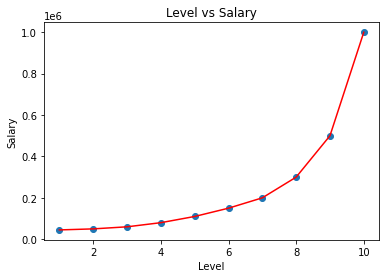

In [9]:
y_predict_salary = drtm.predict(X_level)
plt.plot(X_level, y_predict_salary, color='red')
plt.title('Level vs Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(X_level, y_salary)
plt.show()

In [13]:

export_graphviz(drtm, out_file='tree.dot',feature_names=['Level'])

In [14]:
#arboles con datos de boston
import sklearn.datasets
dsBoston = sklearn.datasets.load_boston()


In [16]:
X_features = dsBoston.data
y_price = dsBoston.target


In [18]:
X_train , X_test , y_train , y_test = train_test_split(X_features, y_price, test_size=0.2, random_state =42)

In [19]:
dtrmBoston = DecisionTreeRegressor()
dtrmBoston.fit(X_train, y_train)

DecisionTreeRegressor()

In [20]:
y_expected = y_test 

y_predicted = dtrmBoston.predict(X_test)

print('R2 is {}'.format(metrics.r2_score(y_expected, y_predicted)))


R2 is 0.8579313527331305


In [21]:
export_graphviz(dtrmBoston, out_file='treeB.dot', feature_names=dsBoston.feature_names)

In [29]:
y_predict = dtrmBoston.predict(X_features)
dfAP = pd.DataFrame({'Actual':y_price, 'Prediccion':y_predict})
dfAP.head(30)

,Actual,Prediccion
0,24.0,33.1
1,21.6,21.6
2,34.7,33.4
3,33.4,33.4
4,36.2,36.2
5,28.7,28.7
6,22.9,22.9
7,27.1,27.1
8,16.5,16.5
9,18.9,20.5


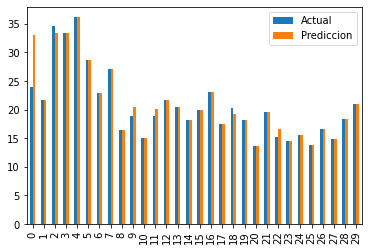

In [28]:
dfAP.head(30).plot(kind='bar')
plt.show()